# Global Supply Chain Analytics Capstone Project | SolarTurbines

### by B.Hagos

## The Goal:
### To perform an initial Exploratory Data Analysis of the accessorial.csv provided by a Global Logistics Analyst. The company wants to crack down on a lot of previously unmonitored accessory charges that may be getting out of control. If we could help him identify patterns and offer significant ways to cut costs, then our project would be considered a success. Further down the line, we may be called to develop predictive & prescriptive models as decision making tools to aid in this process. In this task, I get familiar with the last 3 years of shipping logistics transactions pulled from the company logistics banking account in anticipation of a follow up Client Meeting.

## Import Libraries & Load Data

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read in file & preview
data = pd.read_csv('accessorial.csv')
data.head()

/var/folders/rb/4qzqvc_x3jbczj9trv7ddnjw0000gn/T/ipykernel_50293/3171369640.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('accessorial.csv')


,Unnamed: 0,ACCESSORIAL_AMOUNT,ACCESSORIAL_CHARGE_AMOUNT,ACCESSORIAL_CHARGE_CODE,ACCESSORIAL_CHARGE_DESCRIPTION,AMOUNT_PAID,BILL_DATE,BILL_TYPE,CARRIER_MODE_DESCRIPTION,CARRIER_NAME2,...,ORIGIN_CITY,ORIGIN_COUNTRY_CODE,ORIGIN_NAME2,ORIGIN_STATE,ORIGIN_ZIP,PROCESS_DATE,PRO_NUMBER2,SHIP_DATE,SHIP_WEIGHT,SOLAR_MODE
0,0,116.23644,116.23644,FS,FUEL SURCHARGE,784.27404,9/28/21,LINEHAUL,MOTOR,Harris and Sons,...,MOUNTAIN TOP,US,4.960000e+12,PA,18707,10/12/21,7.150000e+12,9/28/21,2830.0,LTL
1,1,32.77116,32.77116,FS,FUEL SURCHARGE,221.09364,9/24/21,LINEHAUL,MOTOR,Harris and Sons,...,SHAKOPEE,US,8.260000e+12,MN,55379,10/12/21,1.990000e+12,9/24/21,549.0,LTL
2,2,48.34206,38.48706,FS,FUEL SURCHARGE,268.29252,10/8/21,LINEHAUL,MOTOR,Harris and Sons,...,ALEXANDER,US,8.250000e+12,AR,72002,10/19/21,3.090000e+12,10/8/21,688.0,LTL
3,3,22.25916,22.25916,FS,FUEL SURCHARGE,151.68816,9/8/21,LINEHAUL,MOTOR,Harris and Sons,...,FLORENCE,US,4.600000e+12,KY,41042,10/12/21,3.070000e+12,9/8/21,220.0,LTL
4,4,22.52196,22.52196,FS,FUEL SURCHARGE,151.95096,9/24/21,LINEHAUL,MOTOR,Harris and Sons,...,FLORENCE,US,4.600000e+12,KY,41042,10/12/21,1.100000e+12,9/24/21,252.0,LTL


### Inspect the file contents


In [ ]:
data.size

7800436

In [ ]:
data.shape

(278587, 28)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278587 entries, 0 to 278586
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      278587 non-null  int64  
 1   ACCESSORIAL_AMOUNT              278587 non-null  float64
 2   ACCESSORIAL_CHARGE_AMOUNT       278587 non-null  float64
 3   ACCESSORIAL_CHARGE_CODE         278587 non-null  object 
 4   ACCESSORIAL_CHARGE_DESCRIPTION  278587 non-null  object 
 5   AMOUNT_PAID                     278587 non-null  float64
 6   BILL_DATE                       278587 non-null  object 
 7   BILL_TYPE                       278587 non-null  object 
 8   CARRIER_MODE_DESCRIPTION        278587 non-null  object 
 9   CARRIER_NAME2                   278587 non-null  object 
 10  DESTINATION_CITY                278587 non-null  object 
 11  DESTINATION_COUNTRY_CODE        275774 non-null  object 
 12  DESTINATION_NAME

In [ ]:
data.describe()

,Unnamed: 0,ACCESSORIAL_AMOUNT,ACCESSORIAL_CHARGE_AMOUNT,AMOUNT_PAID,DESTINATION_NAME2,IO_CODE,MILEAGE,ORIGIN_NAME2,PRO_NUMBER2,SHIP_WEIGHT
count,278587.000000,278587.000000,278587.000000,278587.000000,2.785870e+05,278587.000000,278587.000000,2.785860e+05,2.692700e+05,2.785870e+05
mean,139293.000000,1758.777308,472.415970,3580.764181,5.260860e+12,2.013518,600.884521,5.412732e+12,5.010882e+12,3.400496e+03
std,80421.284059,13026.211551,3259.079949,16659.259265,2.449229e+12,1.027752,826.578967,3.166968e+12,2.884445e+12,1.586332e+04
min,0.000000,0.013140,0.013140,0.013140,3.215307e+08,1.000000,0.000000,3.406773e+09,6.380052e+07,0.000000e+00
25%,69646.500000,52.560000,23.546880,222.322230,3.700000e+12,1.000000,0.000000,2.510000e+12,2.510000e+12,9.500000e+01
50%,139293.000000,233.090460,51.416820,734.723100,4.460000e+12,2.000000,31.000000,5.320000e+12,5.010000e+12,4.012340e+02
75%,208939.500000,917.645040,166.109310,2479.465440,7.230000e+12,2.000000,1107.000000,8.620000e+12,7.520000e+12,1.492504e+03
max,278586.000000,896151.994600,129950.040400,934680.958000,1.000000e+13,4.000000,4814.000000,1.000000e+13,1.000000e+13,1.421500e+06


## Extra Shipping Costs

### What are the accessory charges that SolarTuribes incurs? What is the distribution? Which ones are the worst?

In [ ]:
data['ACCESSORIAL_CHARGE_DESCRIPTION'].unique()

array(['FUEL SURCHARGE', 'CURIER SERVICE', 'DOCUMENT LEGALIZATION',
       'DRAYAGE', 'OVER DIEM CHARGE', 'RAC', 'TRAILER RENTAL',
       'UNLOADING', 'EXPORT/DOMESTIC PACKING', 'DEMURRAGE',
       'AGILITY SERVICE FEE', 'SAN DIEGO PERMIT', 'LICENSE FEE', 'LOWBED',
       'CROSS BORDER', 'SSC', 'STATE PERMIT', 'ENTRY PREP FEE',
       'TIME DEFINITE', 'REDELIVERY', 'HOT SHOT IAD',
       'GOVERNMENT CHARGES', 'LAYOVER', 'BEYOND CHARGE',
       'BOND FEE/CHARGE', 'RECONSIGNMENT', 'BL PREP/DOC DLVY CHG/DOC FEE',
       'MSC CHRGS', 'TEAM DRIVERS', 'HANDLING', 'IMPORT SERVICE FEE',
       'LOADING/UNLOADING', 'PROCESSING FEE/MERCHANDISE', 'PIER PASS',
       'SPLIT DELIEVERY', 'SECURITY CHARGE', 'EXTRA COPIES MAILING',
       'TERMINAL SERVICE', 'BORDER CROSSING', 'WHARFAGE',
       'WEIGHT VERIFICATION', 'CUSTOM BROKERAGE CHARGE',
       'USE OF LARGE TRUCK', 'IMPORT SECURITY FILING',
       'WEEKLY SERVICE CHARGE', 'DELIVERY ATTEMPT',
       'TRAFFICE MITIGATION FEE', 'BILL OF LADING', 

In [ ]:
# How many distinct fees are there?
data['ACCESSORIAL_CHARGE_DESCRIPTION'].nunique()

138

### What are the top 10 most frequently occuring charges?

In [ ]:
# Get the frequency of each charge and rank the top 10
data['ACCESSORIAL_CHARGE_DESCRIPTION'].value_counts(normalize=True).head(10)

FUEL SURCHARGE                0.459921
CUSTOM BROKERAGE CHARGE       0.076421
MSC CHRGS                     0.068320
HANDLING                      0.052231
PICK UP                       0.036380
DUTY CHARGES                  0.033257
TERMINAL SERVICE              0.027586
PROCESSING FEE/MERCHANDISE    0.025163
MANIFEST                      0.021939
WEIGHT VERIFICATION           0.018662
Name: ACCESSORIAL_CHARGE_DESCRIPTION, dtype: float64

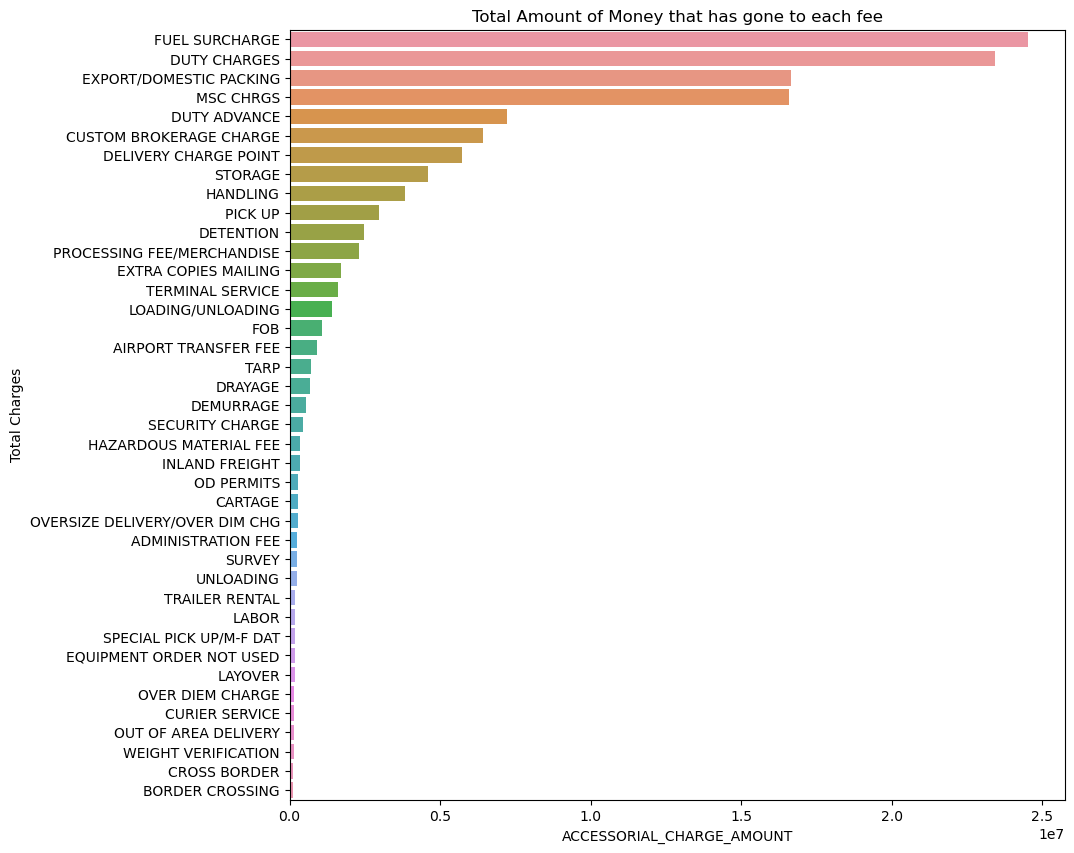

In [ ]:
# Visualize the amount of money that has gone to each fee
fee_data = data.groupby('ACCESSORIAL_CHARGE_DESCRIPTION')['ACCESSORIAL_CHARGE_AMOUNT'].sum()
sorted_fee_data = fee_data.sort_values(ascending=False)
top40 = sorted_fee_data.head(40)
order = top40.index

plt.figure(figsize=(10,10))
sns.barplot(x=fee_data.values, y=fee_data.index, order=order)
plt.xlabel('ACCESSORIAL_CHARGE_AMOUNT')
plt.ylabel('Total Charges')
plt.title('Total Amount of Money that has gone to each fee')
plt.show()

This is interesting. There are some charges that occur more frequently but do not contribute as much to the total shipping costs from accessorial charges. Next, it would be interesting to make a calculated column for the "charge rate" and rank them that way.

<Axes: title={'center': 'Top 40 Fees by Proportion of Charge to Total Amount Paid'}, xlabel='proportion', ylabel='ACCESSORIAL_CHARGE_DESCRIPTION'>

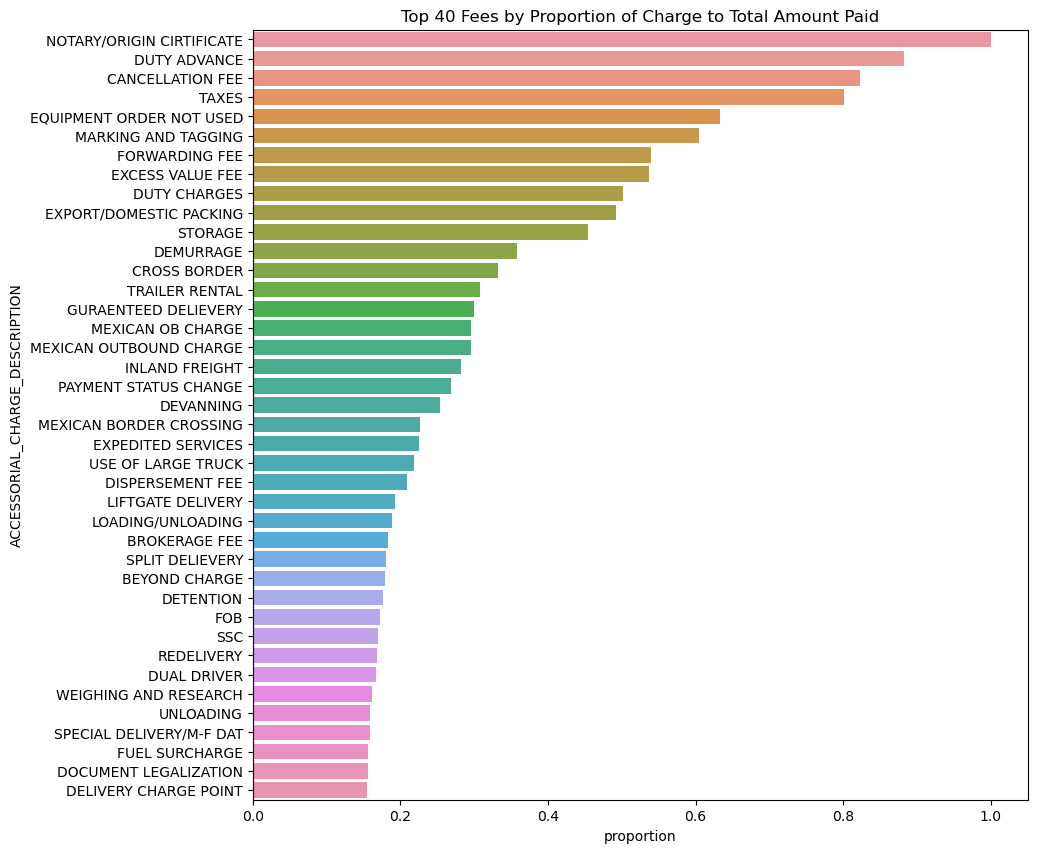

In [ ]:
# Explore Charge Amt vs Proportion of Bill for each Accessory Charge type
#Calculate the totals by fee type and get the proportions
agg_data = data.groupby('ACCESSORIAL_CHARGE_DESCRIPTION').agg({'ACCESSORIAL_CHARGE_AMOUNT':'sum', 'AMOUNT_PAID':'sum'}).reset_index()
agg_data['proportion'] = agg_data['ACCESSORIAL_CHARGE_AMOUNT']/agg_data['AMOUNT_PAID']

prop_sorted_agg_data = agg_data.sort_values(by='proportion', ascending=False)
top_40_prop = prop_sorted_agg_data.head(40)

#Plot the top 40
plt.figure(figsize=(10,10))
plt.title('Top 40 Fees by Proportion of Charge to Total Amount Paid')
sns.barplot(x='proportion', y='ACCESSORIAL_CHARGE_DESCRIPTION', data=top_40_prop, order=top_40_prop['ACCESSORIAL_CHARGE_DESCRIPTION'])

Interesting. These are the big ticket surcharges. Things I am curious about are Equipment not used, storage, payment status change, devanning, split delivery, and redelivery. There are some hints here about the shipping and logistics process. I wonder which of these could potentially be controlled for and reduced.

In [ ]:
# What is the total sum of all the accessory charges? How does that compare to the total amount paid for shipping overall?
print(data[['ACCESSORIAL_CHARGE_AMOUNT', 'AMOUNT_PAID']].sum())

totals = data[['ACCESSORIAL_CHARGE_AMOUNT', 'AMOUNT_PAID']].sum()
totals['ACCESSORIAL_CHARGE_AMOUNT']/totals['AMOUNT_PAID']

ACCESSORIAL_CHARGE_AMOUNT    1.316089e+08
AMOUNT_PAID                  9.975544e+08
dtype: float64


0.13193160635608667

Extra shipping fees account for about $132M in shipping costs, with the total amount paid being almost $1B.
13% of the cost of shipping is coming from accessory charges alone, so if we could find ways to reduce that percentage by even a fraction, it might be a worthwhile prescription for this Global Supply Chain problem

### Side note: What are miscellaneous charges?

In [ ]:
# Look into the subset of the df that only deals with miscellaneous charges and generate descriptive stats
misc_subset = data[data['ACCESSORIAL_CHARGE_DESCRIPTION']=='MSC CHRGS']
misc_subset.describe()

,Unnamed: 0,ACCESSORIAL_AMOUNT,ACCESSORIAL_CHARGE_AMOUNT,AMOUNT_PAID,DESTINATION_NAME2,IO_CODE,MILEAGE,ORIGIN_NAME2,PRO_NUMBER2,SHIP_WEIGHT
count,19033.000000,19033.000000,19033.000000,19033.000000,1.903300e+04,19033.000000,19033.000000,1.903300e+04,1.903300e+04,1.903300e+04
mean,183266.268429,4386.810689,871.782057,7856.834392,4.529261e+12,1.967635,187.063784,5.058523e+12,5.005786e+12,3.985913e+03
std,61246.185571,30854.736881,5464.070577,34854.842579,2.079474e+12,0.638379,465.317688,3.471437e+12,2.880485e+12,2.638141e+04
min,4876.000000,1.314000,0.013140,1.314000,3.215307e+08,1.000000,0.000000,8.160916e+10,4.320301e+08,0.000000e+00
25%,184884.000000,287.752860,21.024000,674.082000,3.700000e+12,2.000000,0.000000,1.610000e+12,2.490000e+12,1.014110e+02
50%,189642.000000,551.880000,49.104180,1471.824540,3.700000e+12,2.000000,0.000000,3.300000e+12,5.000000e+12,3.615520e+02
75%,233929.000000,1801.520280,164.250000,4412.595960,5.320000e+12,2.000000,0.000000,9.110000e+12,7.510000e+12,1.117725e+03
max,274763.000000,846140.431900,125749.800000,846140.431900,1.000000e+13,4.000000,4320.000000,9.980000e+12,1.000000e+13,1.158465e+06


/var/folders/rb/4qzqvc_x3jbczj9trv7ddnjw0000gn/T/ipykernel_50293/3493625949.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = misc_subset.corr()


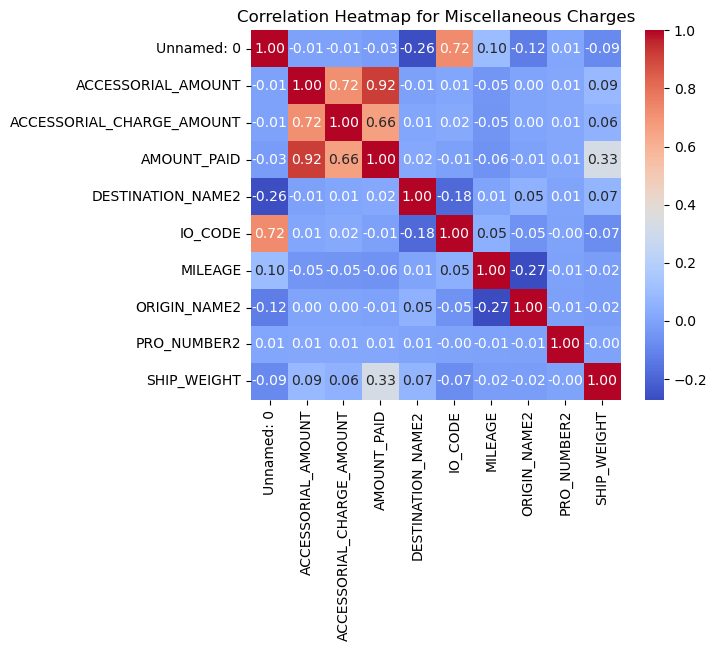

In [ ]:
# Make a heatmap for a quick look at any standout relationships
correlation = misc_subset.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap for Miscellaneous Charges')
plt.show()

The correlations that standout may be hints. These include, ship weight & amt paid, IO code unnamed 0, mileage & origin name 2, destination name 2 etc. Maybe these are particularly heavy items / that are on routes with multiple stopping/transfer points. Perhaps each carrier has their own language for this same type of fee. For example, it may also be referred to as oversize etc.

We need to investigate further to find out what this means and where these costs are coming from.

## Product Specs

### What are the weight distributions for items being shipped?

In [ ]:
# What is the count of distinct ship weights? may correlate w/ specific parts or products
data['SHIP_WEIGHT'].nunique()

13633

In [ ]:
# Get descriptive stats on the ship weight column
data['SHIP_WEIGHT'].describe()

count    2.785870e+05
mean     3.400496e+03
std      1.586332e+04
min      0.000000e+00
25%      9.500000e+01
50%      4.012340e+02
75%      1.492504e+03
max      1.421500e+06
Name: SHIP_WEIGHT, dtype: float64

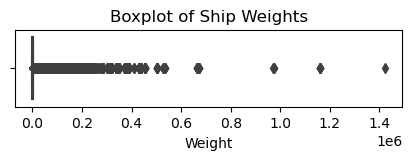

In [ ]:
#Make a boxplot
plt.figure(figsize=(5,1))
sns.boxplot(x=data['SHIP_WEIGHT'])
plt.title('Boxplot of Ship Weights')
plt.xlabel('Weight')
plt.show()

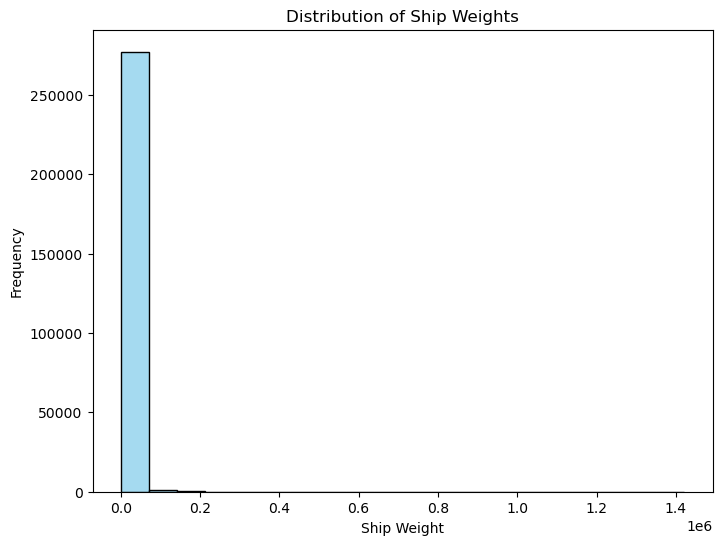

In [ ]:
#Get quantiles
half = data['SHIP_WEIGHT'].quantile(0.5)

#Look at the ship weight distribution
plt.figure(figsize=(8,6))
sns.histplot(data['SHIP_WEIGHT'], kde=False, color='skyblue', bins=20)
plt.title('Distribution of Ship Weights')
plt.xlabel('Ship Weight')
#plt.xlim(0, half)
plt.ylabel('Frequency')
plt.show()

The majority of ship weights fall within the range of 0-300,000lbs, with a max value of 1.4million lbs.

One potential next step could be to look at each quartile and then compare the total amount of money to goes to each fee

## Movement

### How far are these shipments moving? What is the distribution of mileage?

In [ ]:
# Get descriptive stats on the mileage column
data['MILEAGE'].describe()

count    278587.000000
mean        600.884521
std         826.578967
min           0.000000
25%           0.000000
50%          31.000000
75%        1107.000000
max        4814.000000
Name: MILEAGE, dtype: float64

(0.0, 3250.0)

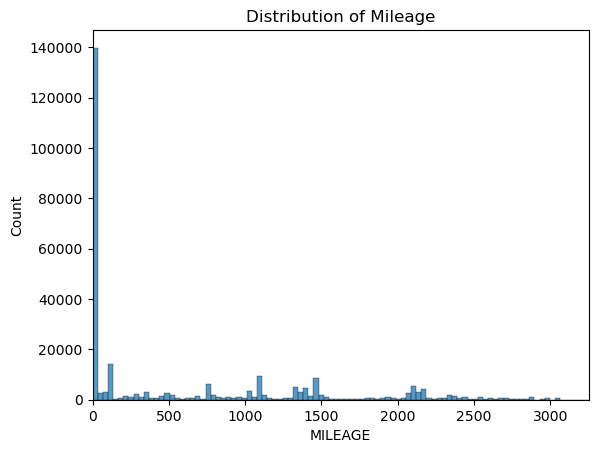

In [ ]:
#Make a histogram
plt.title('Distribution of Mileage')
sns.histplot(data=data, x="MILEAGE")
plt.xlim(0, 3250)

In [ ]:
The peaks are most likely those top 10 hot spots.

### Where are these shipments moving to and from?

In [ ]:
#Rank the most represented country codes for origins
data['ORIGIN_COUNTRY_CODE'].value_counts(normalize=True).head(10)

US    0.787675
MX    0.103004
CA    0.027601
CZ    0.011016
JP    0.009391
DE    0.008025
IT    0.006888
TR    0.006476
GB    0.005378
UK    0.004417
Name: ORIGIN_COUNTRY_CODE, dtype: float64

In [ ]:
#Rank the most represented country codes for destinations
data['DESTINATION_COUNTRY_CODE'].value_counts(normalize=True).head(10)

US    0.749157
CZ    0.122423
BE    0.030108
AU    0.025506
DE    0.015107
CN    0.010755
GB    0.009381
UK    0.004997
CA    0.003198
HK    0.002857
Name: DESTINATION_COUNTRY_CODE, dtype: float64

In [ ]:
# Rank the top origin states
data['ORIGIN_STATE'].value_counts(normalize=True).head(10)

CA    0.309712
TX    0.185636
GA    0.149961
XX    0.062565
BC    0.052424
MX    0.046533
ON    0.020829
OH    0.017791
OK    0.016808
AZ    0.015840
Name: ORIGIN_STATE, dtype: float64

In [ ]:
# Rank the top destination states
data['DESTINATION_STATE'].value_counts(normalize=True).head(10)

CA    0.444800
XX    0.216338
TX    0.158260
GA    0.062397
OK    0.017871
CZ    0.015594
LA    0.013778
AZ    0.008242
PA    0.003839
OH    0.003523
Name: DESTINATION_STATE, dtype: float64

In [ ]:
# Rank the top origin cities
data['ORIGIN_CITY'].value_counts(normalize=True).head(10)

SAN DIEGO      0.175346
FAIRBURN       0.132677
TIJUANA        0.097201
DESOTO         0.090733
ONTARIO        0.024890
MABANK         0.024276
HOUSTON        0.019502
CHANNELVIEW    0.017434
SOUTH GATE     0.015478
GARDENA        0.013572
Name: ORIGIN_CITY, dtype: float64

In [ ]:
# Rank the top destination cities
data['DESTINATION_CITY'].value_counts(normalize=True).head(10)

SAN DIEGO    0.354087
DESOTO       0.058980
FAIRBURN     0.055376
BITOZEVES    0.051815
MABANK       0.032144
ZATEC        0.029930
ZEBRAK       0.025816
HOUSTON      0.024251
GARDENA      0.020407
UNKNOWN      0.018816
Name: DESTINATION_CITY, dtype: float64

## Methods

### What are the bill types?

In [ ]:
# Pull the unique Bill Type column values
data['BILL_TYPE'].unique()

array(['LINEHAUL', 'BALANCE DUE', 'SEP. BILLED ACC.'], dtype=object)

It might be interesting to break down the total amount of money to goes to each fee by bill type to see if certain bills cost more

### What percentage of each carrier mode is used?

In [ ]:
# Get the carrier mode description value counts
data['CARRIER_MODE_DESCRIPTION'].value_counts(normalize=True)

MOTOR         0.752792
AIR           0.247140
INTERNATIO    0.000068
Name: CARRIER_MODE_DESCRIPTION, dtype: float64

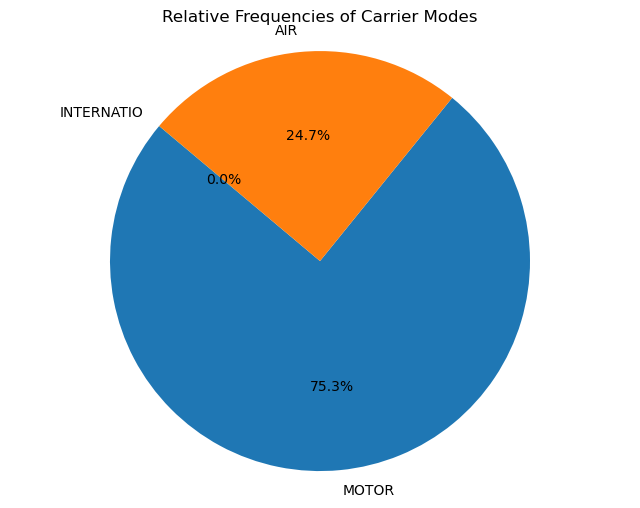

In [ ]:
#Make a pie chart of the carrier modes
rel_freq = data['CARRIER_MODE_DESCRIPTION'].value_counts(normalize=True)

plt.figure(figsize=(8,6))
plt.pie(rel_freq, labels=rel_freq.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage breakdown of Carrier Modes')
plt.axis('equal')
plt.show()


### What is the IO Code distribution?

In [ ]:
# Pull the unique IO Code Description column values
data['IO_CODE_DESCRIPTION'].unique()

array(['Inbound', 'Interfacility', 'Outbound', 'Third Party'],
      dtype=object)

In [ ]:
#Compare the IO Codes
data['IO_CODE_DESCRIPTION'].value_counts(normalize=True)

Inbound          0.378140
Outbound         0.373528
Third Party      0.143327
Interfacility    0.105005
Name: IO_CODE_DESCRIPTION, dtype: float64

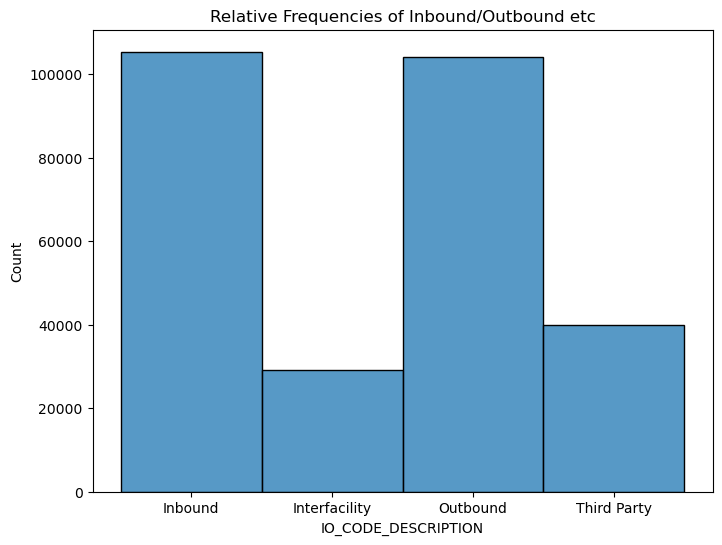

In [ ]:
# Plot the IO categories
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='IO_CODE_DESCRIPTION', discrete=True)
plt.title('Relative Frequencies of Inbound/Outbound etc')
plt.show()

### What is the breakdown of Solar Mode?

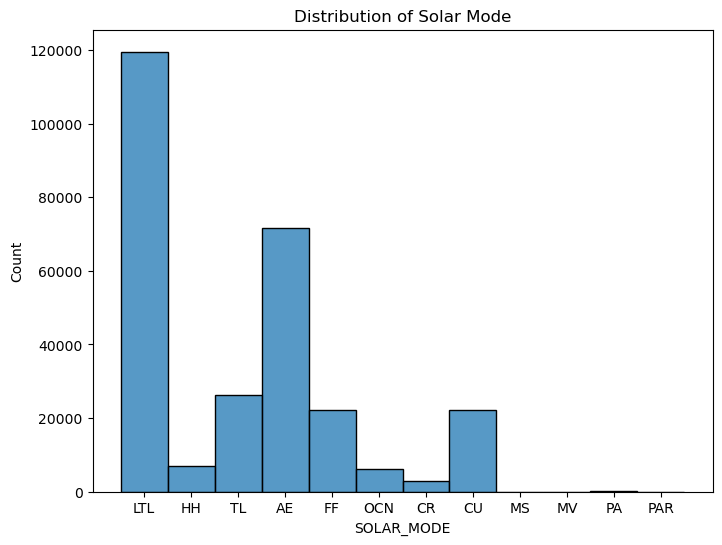

In [ ]:
#Make a histogram for Solar Mode of transportation
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='SOLAR_MODE', discrete=True)
plt.title('Distribution of Solar Mode')
plt.show()

From the data dictionary: transportation method (Ae = air, LTL = less than truck load, TL = Truckload, cu = customs, cr = crating, ff = freight forwarder, HH = heavy haul, OCN = ocean(ship), pa = parcel, par = parcel)

Parcels has 2 different codes - is this significant for the client or is this an error? What is the relationship between each transportation method and cost? Further investigation will be needed.

This may serve as an important variable for optimization.